In [9]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [10]:
import numpy as np
import pandas as pd

In [11]:
# Reading the .csv
days = pd.read_csv(r"C:\Users\ANANYA\Downloads\day.csv")

In [12]:
# Check the head of the dataset
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Renaming the various columns of the days dataframe

In [13]:
days.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
days.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Checking the shape of the dataframe.
days.shape

(730, 16)

In [15]:
# Checking the information of each column.
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [16]:
# summary of the dataset.
days.describe()

,instant,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Mapping variables season, month, weathersit, weekday

In [17]:
#Mapping variables season, month, weathersit, weekday

days['season']=days.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
days['month']=days.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
days['weathersit']=days.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
days['weekday']=days.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [18]:
# Checking whether the mapping is done correctly.
days.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

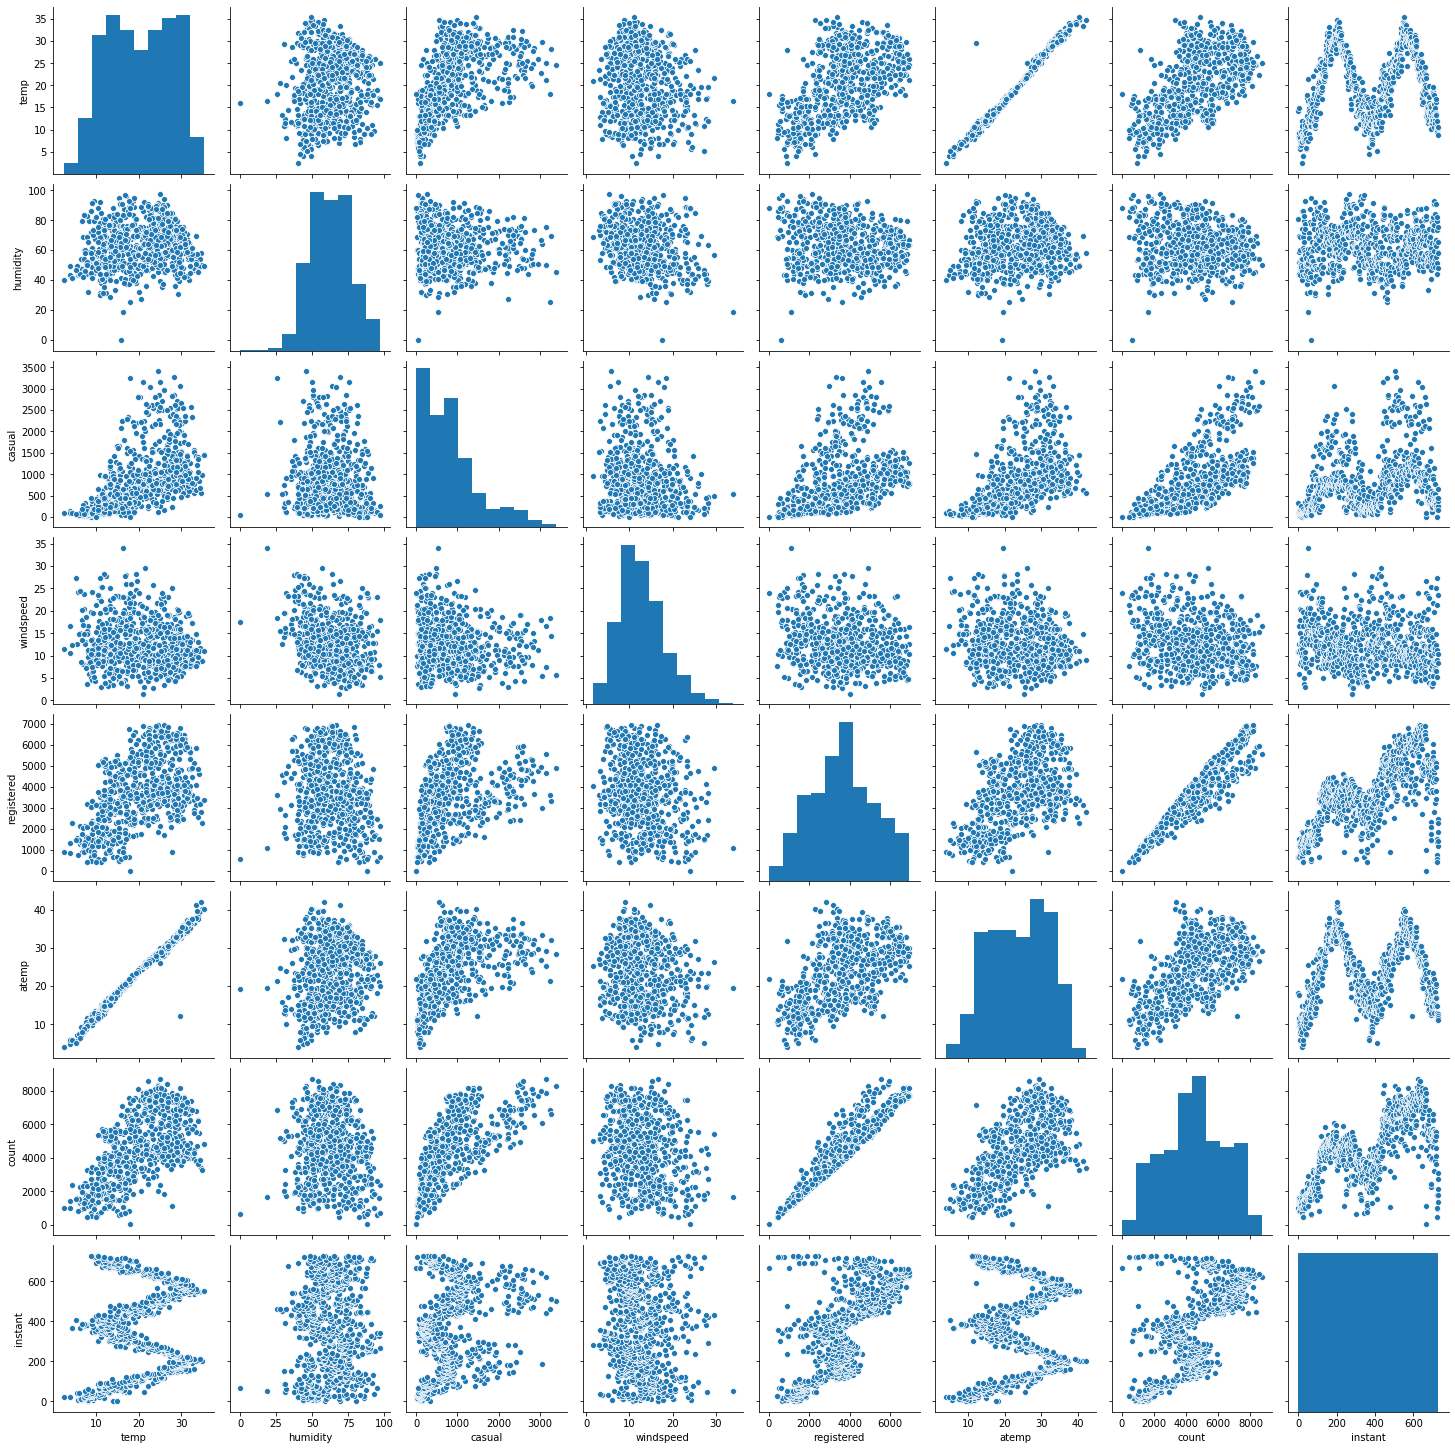

In [20]:
#Pairplot for numeric variables
sns.pairplot(days, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

By analysing all the plots above, we can see that there are some independent variables look positively correlated to the 'count' variable.

* Bike rentals are more correlated to temperature
* Since temp and atemp are highly correlated we can drop one of the columns.

#### Visualising Categorical Variables

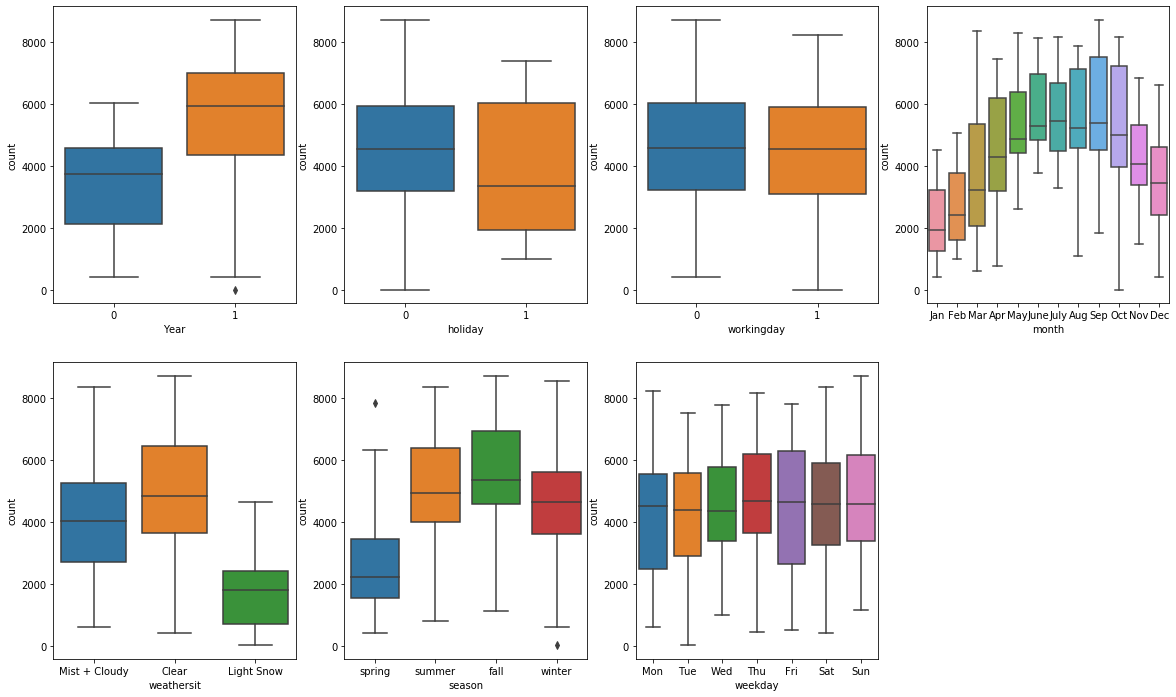

In [21]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = days)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = days)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = days)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = days)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = days)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = days)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = days)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

* Bike Rentals are more during the Fall season and then in summer
* Bike Rentals are more in the year 2019 compared to 2018
* Bike Rentals are more in partly cloudy weather
* Bike Rentals are more on Saturday,wednesday and thursday

#### Heatmap to see correlation between variables

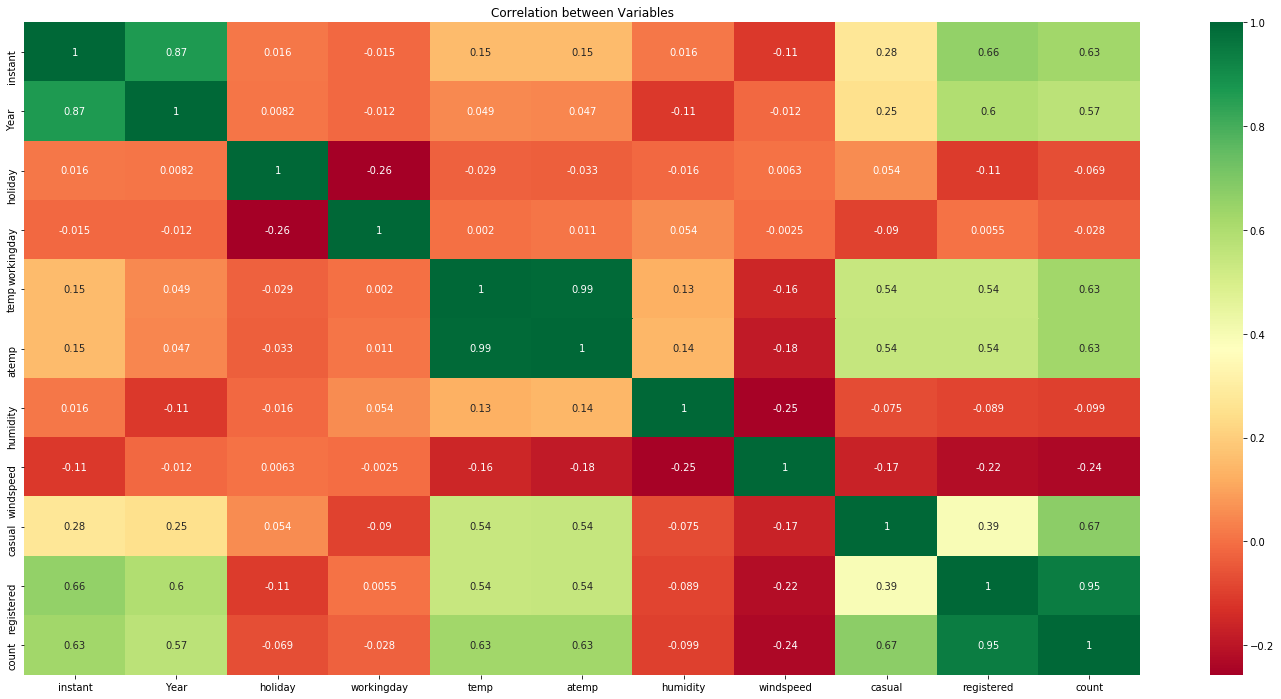

In [22]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(days.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

* As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated     to 'count' variable

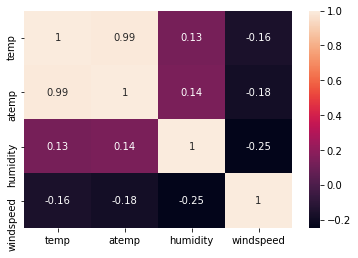

In [23]:
data= days[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)
plt.show()

* It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.
* Hence dropping atemp.

#### Drop the unnecessary variables from the dataset

In [24]:
#drop unnecessary columns
days=days.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
days.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Step 3: Data Preparation

Dummy variables

In [25]:
# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(days.month,drop_first=True)
weekdays=pd.get_dummies(days.weekday,drop_first=True)
weather_sit=pd.get_dummies(days.weathersit,drop_first=True)
seasons=pd.get_dummies(days.season,drop_first=True)

In [26]:
# Add the results to the original bike dataframe
days=pd.concat([months,weekdays,weather_sit,seasons,days],axis=1)
days.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [27]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
days.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
days.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


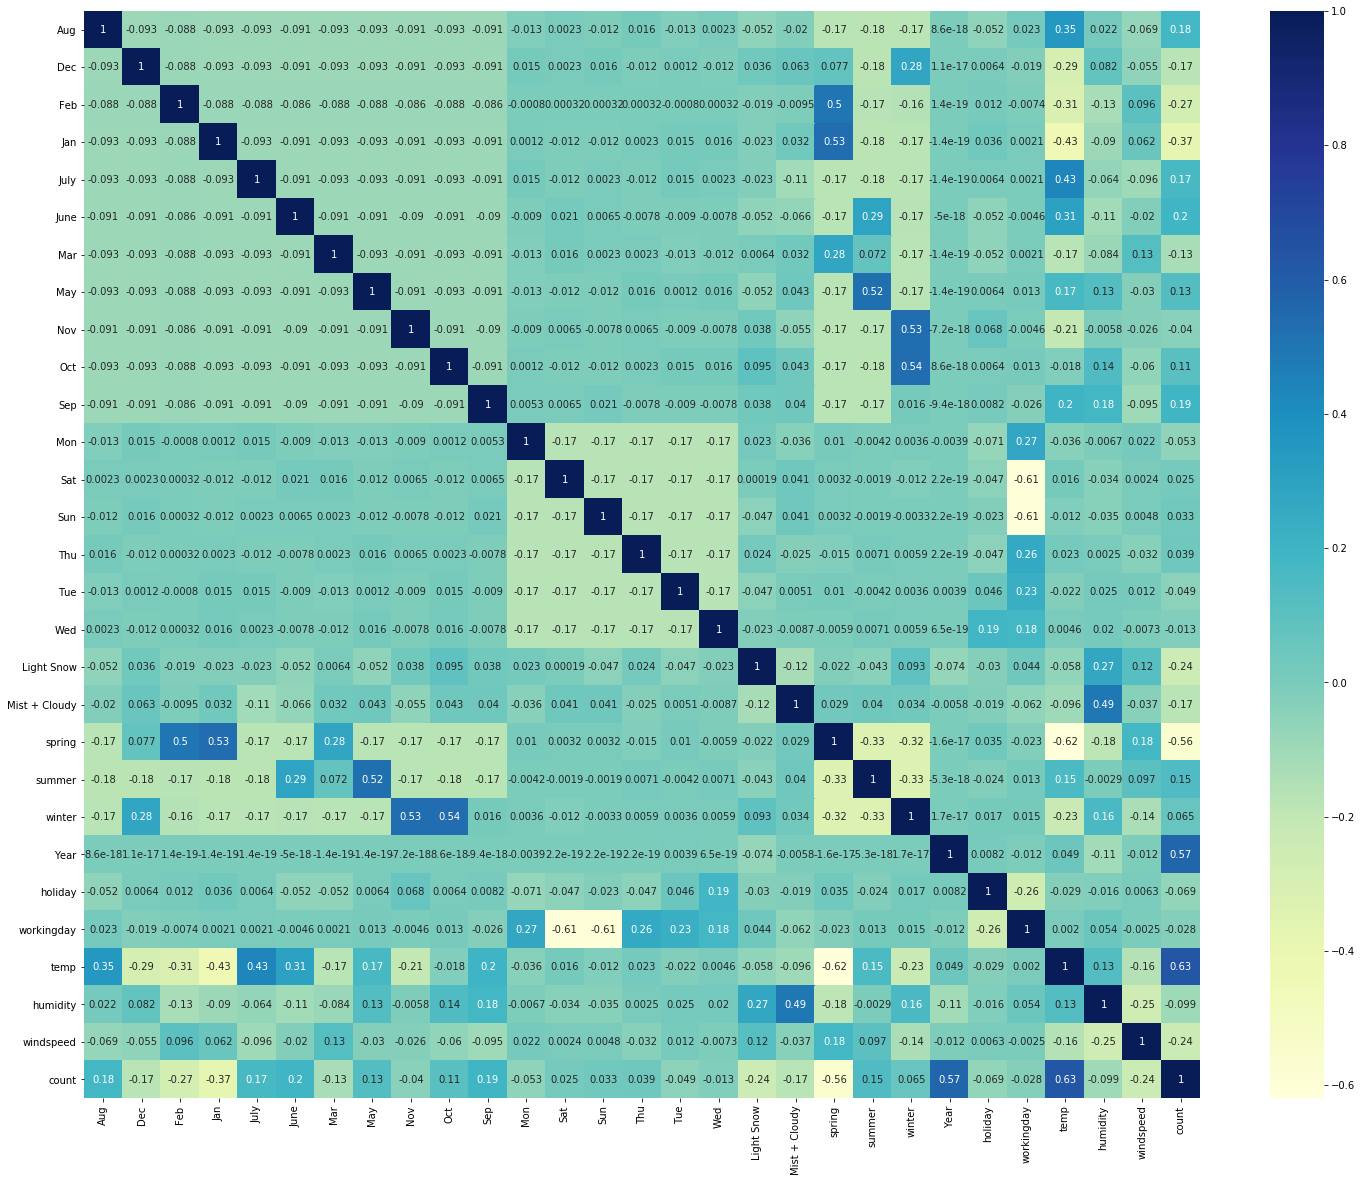

In [28]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(days.corr(), cmap='YlGnBu',annot = True)
plt.show()

We can see that temperature,Summer season are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

### Step 4: Splitting the Data into Training and Testing Sets

Before model building, first need to perform the test-train split and scale the features.

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

days_train, days_test = train_test_split(days, train_size = 0.7, random_state = 100)

In [30]:
#Rows and columns after split
print(days_train.shape)
print(days_test.shape)

(510, 29)
(220, 29)


In [31]:
days_train.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'Year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [32]:
days_test.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'Year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [33]:
days_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,29.246653,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,16.980847,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,10.489153,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,15.443347,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13.803347,72.9583,14.707907,1683


In [34]:
days_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,29.315000,30.5000,19.583229,4968


#### Rescaling the Features

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

#### Min-Max scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
days_train[num_vars] = scaler.fit_transform(days_train[num_vars])
days_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [37]:
#Checking numeric variables(min and max) after scaling
days_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

#### Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors

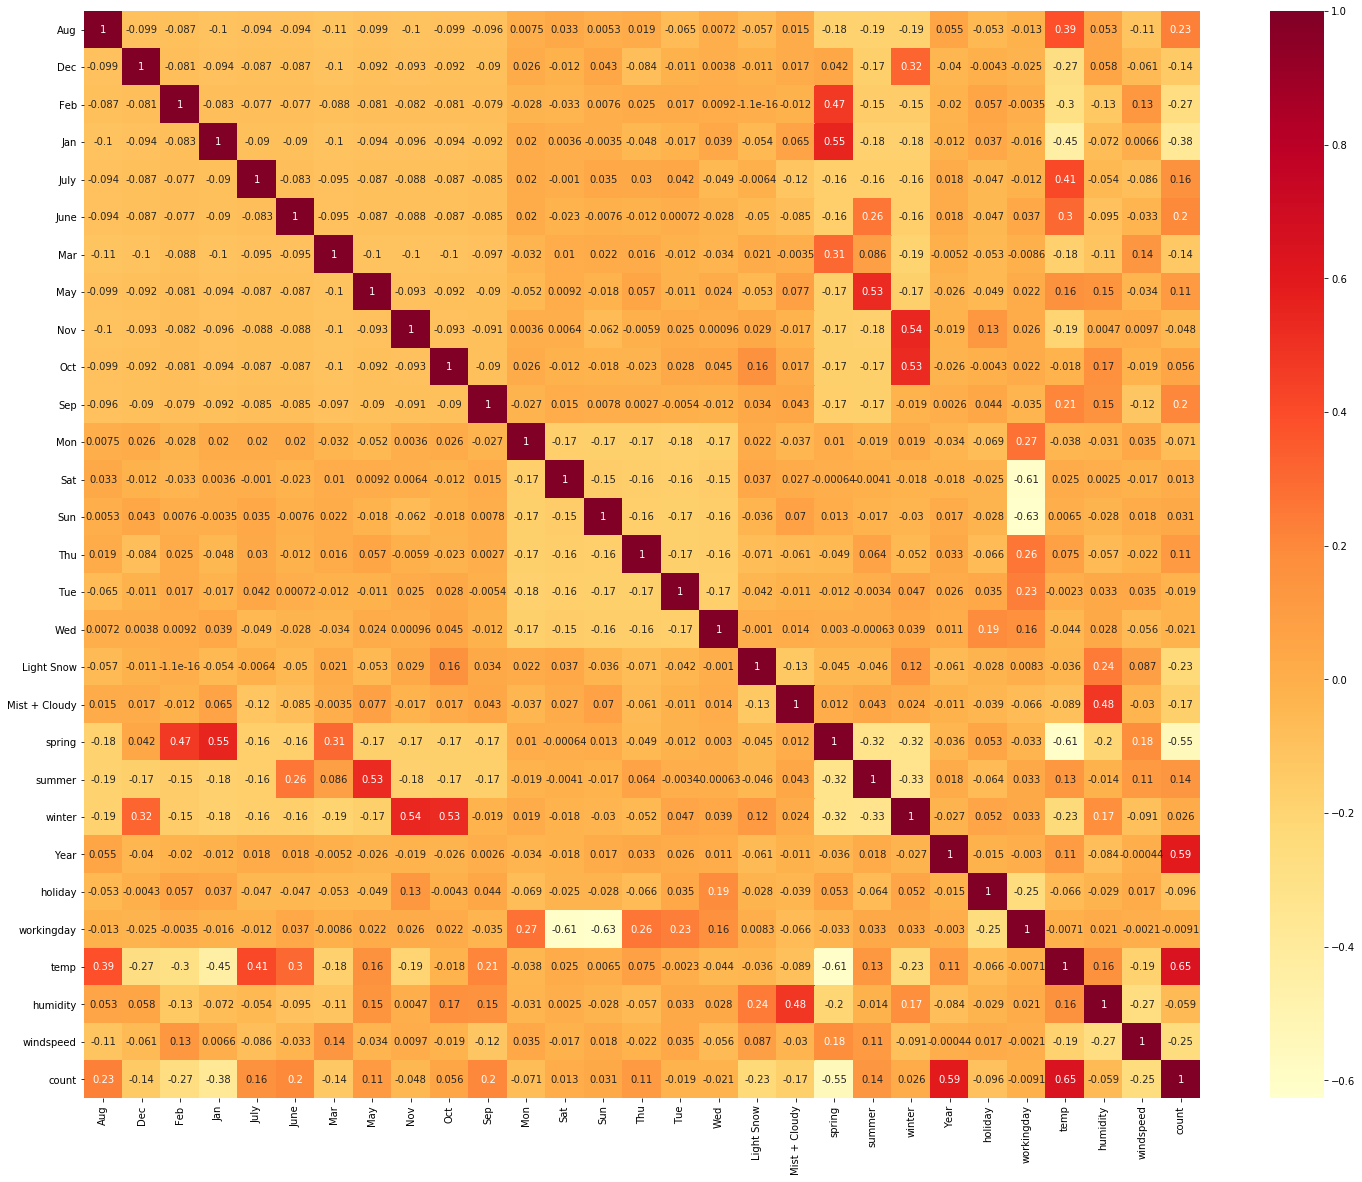

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(days_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

From the heatmap we can see temp, year are correlated to the 'count' variable. 

#### Dividing into X and Y sets for the model building

In [39]:
#Divide the data into X and y
y_train = days_train.pop('count')
X_train = days_train

### Step 5: Building a linear model

#### Recursive Feature Elimination

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [43]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [44]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        15:29:33   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
Year              0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
humidity         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [49]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [51]:
#Drop Dec
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

In [52]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          4.41e-189
Time:                        15:29:34   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [53]:
#Drop the constant
X_train_lm1=X_train_lm1.drop(['const'],axis=1)

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
6,spring,4.37
8,winter,3.78
7,summer,2.80
5,Mist + Cloudy,2.29
9,Year,2.09
0,Jan,1.67
2,Nov,1.60


In [55]:
#Drop Nov
X_train_new2 = X_train_lm1.drop(["Nov"], axis = 1)

In [56]:
#Building a model
X_train_lm2= sm.add_constant(X_train_new2)
lm2=sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          7.59e-190
Time:                        15:29:35   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483

In [57]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,29.02
10,temp,16.71
12,windspeed,4.66
5,spring,4.34
7,winter,3.36
6,summer,2.79
4,Mist + Cloudy,2.29
8,Year,2.09
0,Jan,1.67
1,July,1.59


In [59]:
#Drop Jan
X_train_new3 = X_train_lm2.drop(["Jan"], axis = 1)

In [60]:
#Building a model
X_train_lm3= sm.add_constant(X_train_new3)
lm3=sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.95e-190
Time:                        15:29:36   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258

In [61]:
#Drop the constant
X_train_new4=X_train_lm3.drop(['const'],axis=1)

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.03
9,temp,16.03
11,windspeed,4.65
4,spring,4.01
6,winter,3.33
5,summer,2.79
3,Mist + Cloudy,2.28
7,Year,2.08
0,July,1.58
1,Sep,1.38


In [63]:
#Drop humidity
X_train_new5 = X_train_lm3.drop(["humidity"], axis = 1)

In [64]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        15:29:36   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [65]:
#Drop the constant
X_train_new5 =X_train_lm5.drop(['const'],axis=1)

In [66]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,Year,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


In [67]:
#Drop July
X_train_new6 = X_train_lm5.drop(["July"], axis = 1)

In [68]:
#Building a model
X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          1.47e-186
Time:                        15:29:37   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [69]:
#Drop the constant
X_train_new6=X_train_lm6.drop(['const'],axis=1)

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.60
8,temp,3.84
6,Year,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
2,Mist + Cloudy,1.55
0,Sep,1.23
1,Light Snow,1.08
7,holiday,1.04


In [71]:
#Drop spring
X_train_new7 = X_train_lm6.drop(["spring"], axis = 1)

In [72]:
#Building a model
X_train_lm7= sm.add_constant(X_train_new7)
lm7=sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.83e-186
Time:                        15:29:38   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1259      0.017      7.508

In [73]:
#Drop the constant
X_train_new7=X_train_lm7.drop(['const'],axis=1)

In [74]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,3.68
8,windspeed,3.06
5,Year,2.00
3,summer,1.57
2,Mist + Cloudy,1.48
4,winter,1.37
0,Sep,1.20
1,Light Snow,1.08
6,holiday,1.04


### Yes! Now we can see we have our model.
### The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
### The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.830 or 83%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.827 or 82%

### Step 6: Residual Analysis of the train data

In [75]:
X_train_lm7

,const,Sep,Light Snow,Mist + Cloudy,summer,winter,Year,holiday,temp,windspeed
576,1.0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,1,0,1,0,0.395666,0.188475
111,1.0,0,0,1,1,0,0,0,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,1,0,0.863973,0.187140
53,1.0,0,0,0,0,0,0,0,0.202618,0.111379
350,1.0,0,0,1,0,1,0,0,0.248216,0.431816
79,1.0,0,0,1,1,0,0,0,0.462664,0.529881


In [76]:
#y train predicted
y_train_pred = lm7.predict(X_train_lm7)

In [77]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

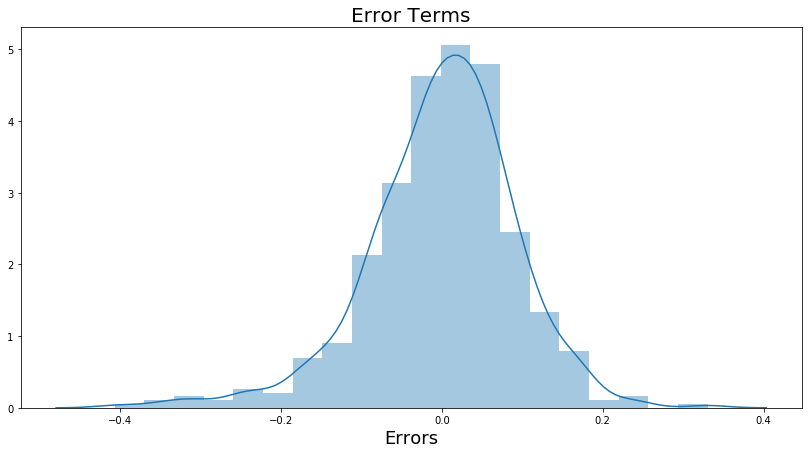

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see Error terms are normally distributed

### Step 7: Making Predictions

#### Applying the scaling on the test sets

In [79]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
days_test[num_vars] = scaler.transform(days_test[num_vars])
days_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test

In [80]:
#Dividing into X_test and y_test
y_test = days_test.pop('count')
X_test = days_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [81]:
#Columns
X_train_new3.columns

Index(['July', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

#### Now let's use our model to make predictions.

In [82]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,humidity,windspeed
184,1.0,1,0,0,1,0,0,0,0,1,0.831783,0.657364,0.084219
535,1.0,0,0,0,0,0,1,0,1,0,0.901354,0.610133,0.153728
299,1.0,0,0,0,1,0,0,1,0,0,0.511964,0.837699,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0.881625,0.437098,0.339570
152,1.0,0,0,0,0,0,1,0,0,0,0.817246,0.314298,0.537414


In [83]:
# Making predictions
y_pred = lm3.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set¶

In [84]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8151738700604123

In [85]:
# n is number of rows in test dataset
n = X_test_new1.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new1.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-0.81517387)*(n-1)/(n-p-1),4)
adjusted_r2


0.8035

In [86]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.094

In [87]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0695

### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

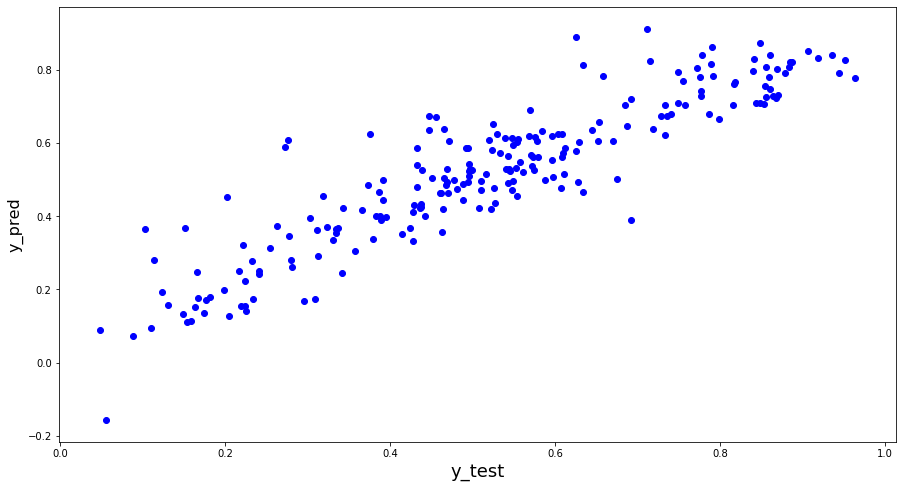

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

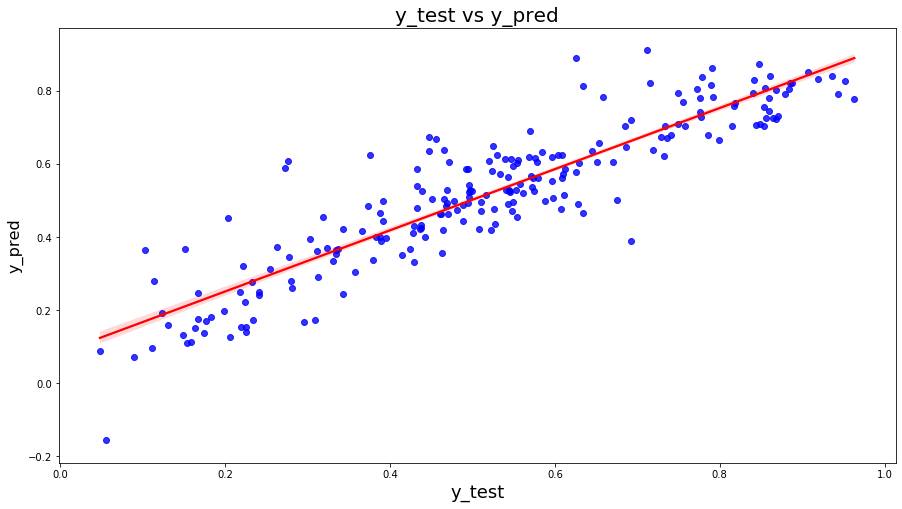

In [89]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


### We can see that the equation of our best fitted line is:

count=0.5480×temp+0.1012×Sep+0.0881×summer+0.1283×winter+0.2329×Year−0.2829×Light Snow −0.0784×Mist+Cloudy−0.0987x holiday-0.1582xwindspeed

### Final Result Comparison between Train model and Test:

- Train R^2 : 0.830
- Train Adjusted R^2 : 0.827
- Test R^2: 0.8151
- Test Adjusted R^2: 0.8035
Yes! Its a best model

### Conclusion:
The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

- summer : 0.0881
- Temperature : 0.5480
- Mist+Cloudy : -0.0784
- winter:0.1283
- holiday : -0.0987

### As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.